In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

 **Importing all Libraries**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from keras.preprocessing import image
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('../input/hogfer/hogfernov28.csv') #please change this path according to the saved files

In [ ]:
data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
x_data = data['pixels']
y_data = data['emotion']

emotion_labels = ['0:angry','1:disgust','2:fear','3:Happy', '4:Sad','5:Surprise', '7:Neutral

**DATA REPRESENTING ON BAR GRAPH**

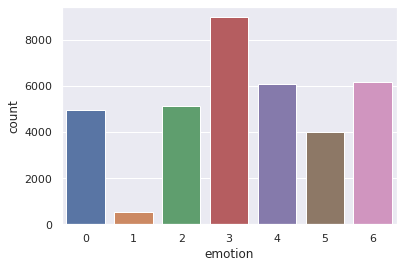

In [ ]:
#data ploting on bar graph 
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="emotion", data=data)

**BALINCING THE DATA USING RANDOM OVER SAMPLING**

In [ ]:
#sampling strategy set to auto, smapling done based on no of observations having majority class 
oversampler = RandomOverSampler(sampling_strategy='auto')
#reshape(-1,1), reshaping  unknown count of the rows and in 1 column##values
x_data, y_data = oversampler.fit_resample(x_data.values.reshape(-1,1), y_data)
print(x_data.shape," ",y_data.shape)

(62923, 1)   (62923,)


In [ ]:
# value_count=it returns an object that containing counts of unquie values
y_data.value_counts() 

0    8989
2    8989
4    8989
6    8989
3    8989
5    8989
1    8989
Name: emotion, dtype: int64

In [ ]:
#flatten:Return a copy of the array collapsed into one dimension
x_data = pd.Series(x_data.flatten())
x_data

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
62918    33 30 27 38 39 31 21 13 14 18 22 19 89 205 203...
62919    177 172 163 156 131 104 102 110 119 118 119 12...
62920    1 5 9 16 23 12 8 10 13 21 32 42 33 45 67 76 86...
62921    17 13 12 14 20 29 35 35 36 45 44 45 37 37 45 4...
62922    148 170 140 132 130 130 130 111 84 65 55 49 49...
Length: 62923, dtype: object

In [ ]:
# mapping string split to x_data to dividing string data without having white space b/w them 
#a=['shanmukh john','nani devena', 'raju pawan'] ==> a=['shanmukh','john','nani','devena','raju','pawan']
#np.float32 converts a number stored in a string or integer into a floating point number and in 32 bits
x_data = np.array(list(map(str.split, x_data)), np.float32)
#normalizing pixel values from 0 to 1
x_data/=255
#printing upto 10 elemets
x_data[:10] 

array([[0.27450982, 0.3137255 , 0.32156864, ..., 0.41568628, 0.42745098,
        0.32156864],
       [0.5921569 , 0.5882353 , 0.5764706 , ..., 0.75686276, 0.7176471 ,
        0.72156864],
       [0.90588236, 0.83137256, 0.6117647 , ..., 0.34509805, 0.43137255,
        0.59607846],
       ...,
       [0.3019608 , 0.30588236, 0.30980393, ..., 0.49019608, 0.2627451 ,
        0.26666668],
       [0.33333334, 0.32941177, 0.3529412 , ..., 0.22745098, 0.28627452,
        0.32941177],
       [1.        , 0.99607843, 1.        , ..., 0.99607843, 1.        ,
        1.        ]], dtype=float32)

In [ ]:
#reshape(-1, 48, 48, 1):image size 48*48
x_data = x_data.reshape(-1, 48, 48, 1)
x_data.shape 

(62923, 48, 48, 1)

In [ ]:
y_data = np.array(y_data)
#shape[0]:gives no of rows 
y_data = y_data.reshape(y_data.shape[0], 1)
y_data.shape

(62923, 1)

**SPLITING THE DATASET INTO TRAIN AND TEST**

In [ ]:
#test size =10%
#setting a number to random state gives training data is same while running multiple times
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 45)


***BUILDING A MODEL***

In [ ]:
model = Sequential([
    Input((48, 48, 1)),
    #spatial dimention
    #1st conv layer with 32 filetrs, and kernal size(matrix_size) is 3*3, filter step to next pixel with stride (1,1), valid padding 
    Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    #2nd conv layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'same'),
    #axis=3:it represnts dimentions(height,width,channel)
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    
    #3rd conv layer
    Conv2D(64, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    #4th conv layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'same'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    #5th conv layer
    Conv2D(128, (3,3), strides=(1,1), padding = 'valid'),
    BatchNormalization(axis=3),
    Activation('relu'),
    MaxPooling2D((2,2)),
    #flatten(): it converts into 1- dimention array inputting to next layer
    Flatten(),
    #fully connected network with 200 neurons
    Dense(200, activation='relu'),
    #dropout rate is 0.6
    Dropout(0.6),
    #output with neurons
    Dense(7, activation = 'softmax')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 64)        0

2022-12-11 08:29:51.582234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 08:29:51.669058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 08:29:51.669878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-11 08:29:51.672704: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

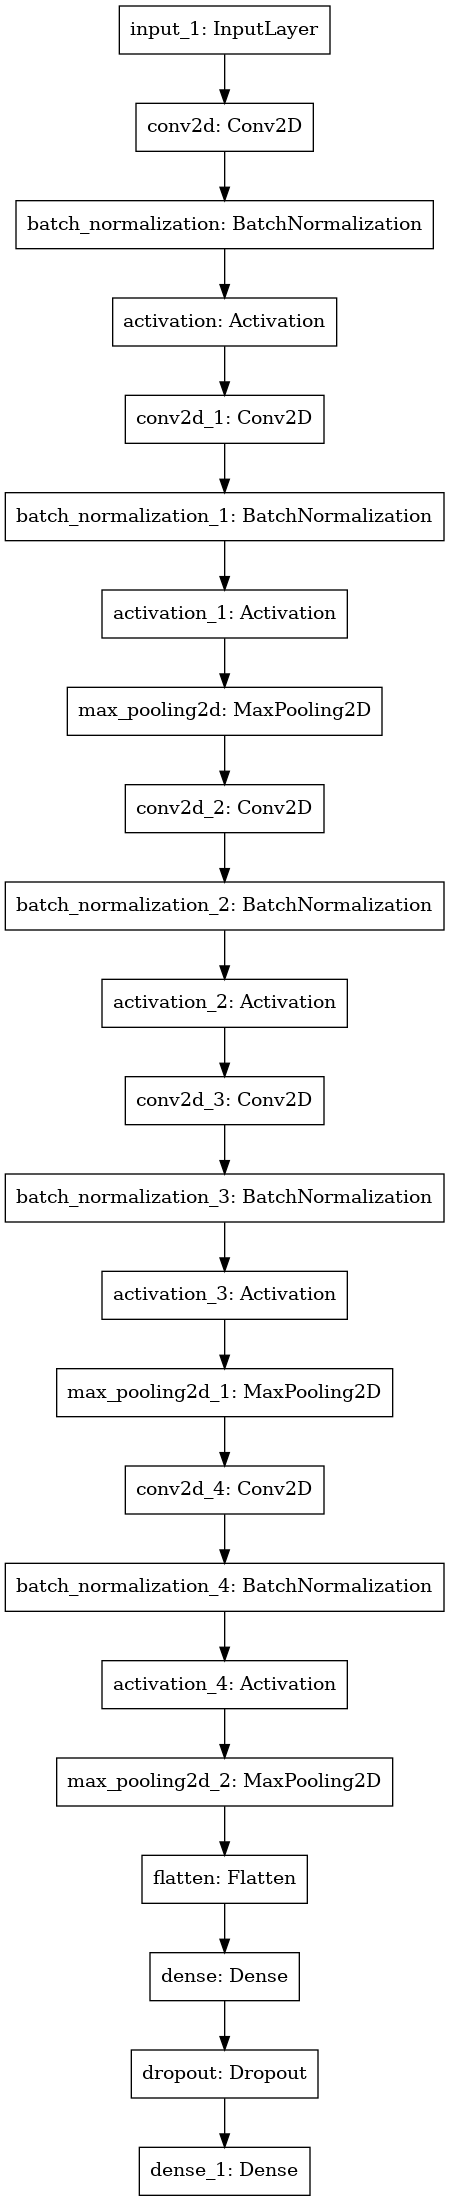

In [ ]:
#tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = True, show_dtype = True)
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes = False, show_dtype = False)

**MODEL COMPILING**

In [ ]:
#model.Compile defines the loss function, the optimizer and the metrics
#model.compile(optimizer = Adam(learning_rate=0.0001,decay=1e-6),loss = 'categorical_crossentropy',metrics = ['accuracy'])
#model.compile(optimizer = Adam(learning_rate=0.0001,decay=1e-6),loss = 'mean_squared_error',metrics = ['accuracy'])
#tf.keras.losses.MeanAbsoluteError()
#tf.keras.losses.MeanSquaredLogarithmicError()
model.compile(optimizer = Adam(learning_rate=0.0001,decay=1e-6),loss = tf.keras.losses.MeanSquaredLogarithmicError(),metrics = ['accuracy'])

**CALLBACKS**

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=11,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=7,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
]

In [ ]:
#to_categorical:Converts a class vector (integers) to binary class matrix
#we are using categorical_crossentopy loss function, labels to be provided in a one_hot representation
#one hot vector:1*N matrix in banary
y_train = np_utils.to_categorical(y_train, 7)
y_train.shape

(50338, 7)

In [ ]:
y_test = np_utils.to_categorical(y_test, 7)
y_test.shape

(12585, 7)

***FITTING THE MODEL***

In [ ]:
history=model.fit(x_train, y_train, epochs = 100, validation_data=(x_test, y_test),callbacks = callbacks,)


2022-12-11 08:29:56.192225: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-12-11 08:29:57.849496: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1574/1574 [==============================] - 22s 9ms/step - loss: 0.0552 - accuracy: 0.3140 - val_loss: 0.0465 - val_accuracy: 0.4564
Epoch 2/100
1574/1574 [==============================] - 14s 9ms/step - loss: 0.0464 - accuracy: 0.4530 - val_loss: 0.0412 - val_accuracy: 0.5249
Epoch 3/100
1574/1574 [==============================] - 14s 9ms/step - loss: 0.0416 - accuracy: 0.5231 - val_loss: 0.0379 - val_accuracy: 0.5732
Epoch 4/100
1574/1574 [==============================] - 14s 9ms/step - loss: 0.0383 - accuracy: 0.5672 - val_loss: 0.0359 - val_accuracy: 0.5946
Epoch 5/100
1574/1574 [==============================] - 13s 9ms/step - loss: 0.0358 - accuracy: 0.6009 - val_loss: 0.0337 - val_accuracy: 0.6348
Epoch 6/100
1574/1574 [==============================] - 14s 9ms/step - loss: 0.0335 - accuracy: 0.6305 - val_loss: 0.0319 - val_accuracy: 0.6524
Epoch 7/100
1574/1574 [==============================] - 13s 9ms/step - loss: 0.0315 - accuracy: 0.6587 - val_loss: 0.0316 - val_accurac

**EVALUATION**

In [ ]:
model.evaluate(x_test,y_test)

394/394 [==============================] - 1s 3ms/step - loss: 0.0192 - accuracy: 0.8346


[0.01923806220293045, 0.8345649838447571]

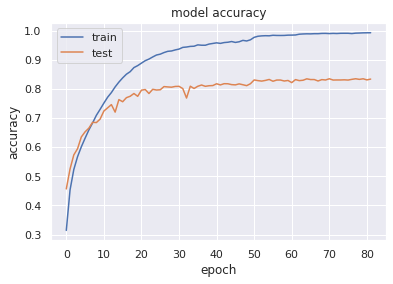

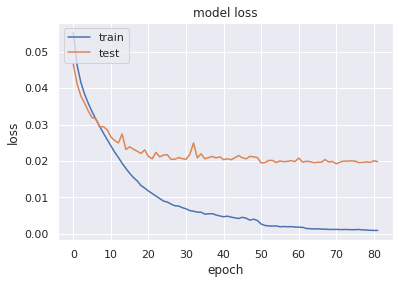

In [ ]:
#plotting graph to show model accuracy and modle loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
##emotion_labels = ['0:angry','1:disgust','2:fear','3:Happy', '4:Sad','5:Surprise', '7:Neutral']
y_pred = model.predict(x_test)
y_result = []

for pred in y_pred:
    y_result.append(np.argmax(pred))
y_result[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 6]

In [ ]:
y_actual = []

for pred in y_test:
    y_actual.append(np.argmax(pred))
y_actual[:10]

[6, 5, 5, 6, 1, 0, 3, 4, 1, 3]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1770
           1       0.99      1.00      1.00      1778
           2       0.82      0.79      0.80      1775
           3       0.82      0.80      0.81      1872
           4       0.74      0.74      0.74      1825
           5       0.90      0.95      0.93      1755
           6       0.76      0.76      0.76      1810

    accuracy                           0.83     12585
   macro avg       0.83      0.84      0.83     12585
weighted avg       0.83      0.83      0.83     12585



**Saving The Model**

### model.save('fer2013finalb1120.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_actual, y_result))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1770
           1       0.99      1.00      1.00      1778
           2       0.82      0.79      0.80      1775
           3       0.82      0.80      0.81      1872
           4       0.74      0.74      0.74      1825
           5       0.90      0.95      0.93      1755
           6       0.76      0.76      0.76      1810

    accuracy                           0.83     12585
   macro avg       0.83      0.84      0.83     12585
weighted avg       0.83      0.83      0.83     12585



Text(66.5, 0.5, 'Actual')

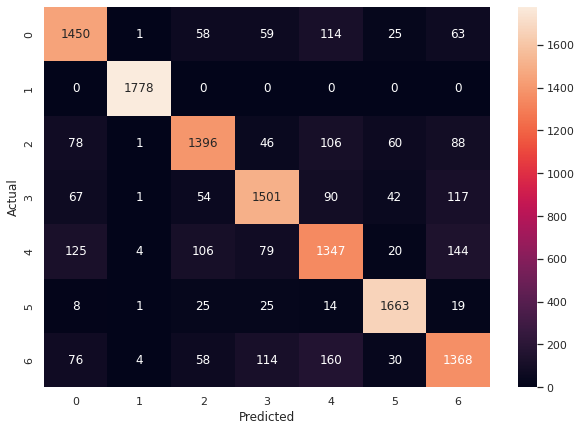

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = y_actual, predictions = y_result)

plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
model.save('hogferdec11afternoon.h5')